In [19]:
# Load data from MySQL to perform exploratory data analysis
%load_ext sql
import settings
import mysql.connector as connection
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# try:
db_connection = connection.connect (
    host="localhost",
    user="root",
    password="reuben80@Kihiu",
    database="Facebook",
    charset = 'utf8'
)
#  db_connection = connection.connect(
#     host="localhost",
#     user="root",
#     password="reuben80@Kihiu",
#     database="mysql",
#     charset = 'utf8'
#   )

#  query = "CREATE DATABASE Facebook"

#  cursor = db_connection.cursor()  #create a cursor to execute queries
#  cursor.execute(query)
#  print(cursor.fetchall())

# except Exception as e:
#     db_connection.close()
#     print(atr(e)) 


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


/tmp/ipykernel_41394/2423343204.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)


Airbnb Negative Tweets Monitor: 
  2019-08-14 20:57:26  RT @ETrainn71: Saw this on Facebook &amp; Ill always respect cops even tho theirs so much hate going on at the moment https://t.co/SLVvziyz9H
  2019-08-14 20:57:26  RT @ETrainn71: Saw this on Facebook &amp; Ill always respect cops even tho theirs so much hate going on at the moment https://t.co/SLVvziyz9H
  2019-08-14 20:57:31  RT @reddogsusie: #TN #MEMPHIS
BLIND SENIOR OWNER SURRENDERED WITH BF EDDIEBumper 8yo girl blind, given to an ACO in shocking state wit
  2019-08-14 20:57:32  RT @ETrainn71: Saw this on Facebook &amp; Ill always respect cops even tho theirs so much hate going on at the moment https://t.co/SLVvziyz9H
  2019-08-14 20:57:37  Sick of gettin invites to theses pages fi every cunt on Facebook bolt ya nugget
  2019-08-14 20:57:47  Grim vote leave adverts. Exploited fears.
  2019-08-14 20:57:47  Hey  @facebook your report hate speech send button isnt working... https://t.co/PCwDqphuBV
  2019-08-14 20:57:51  RT @Globa

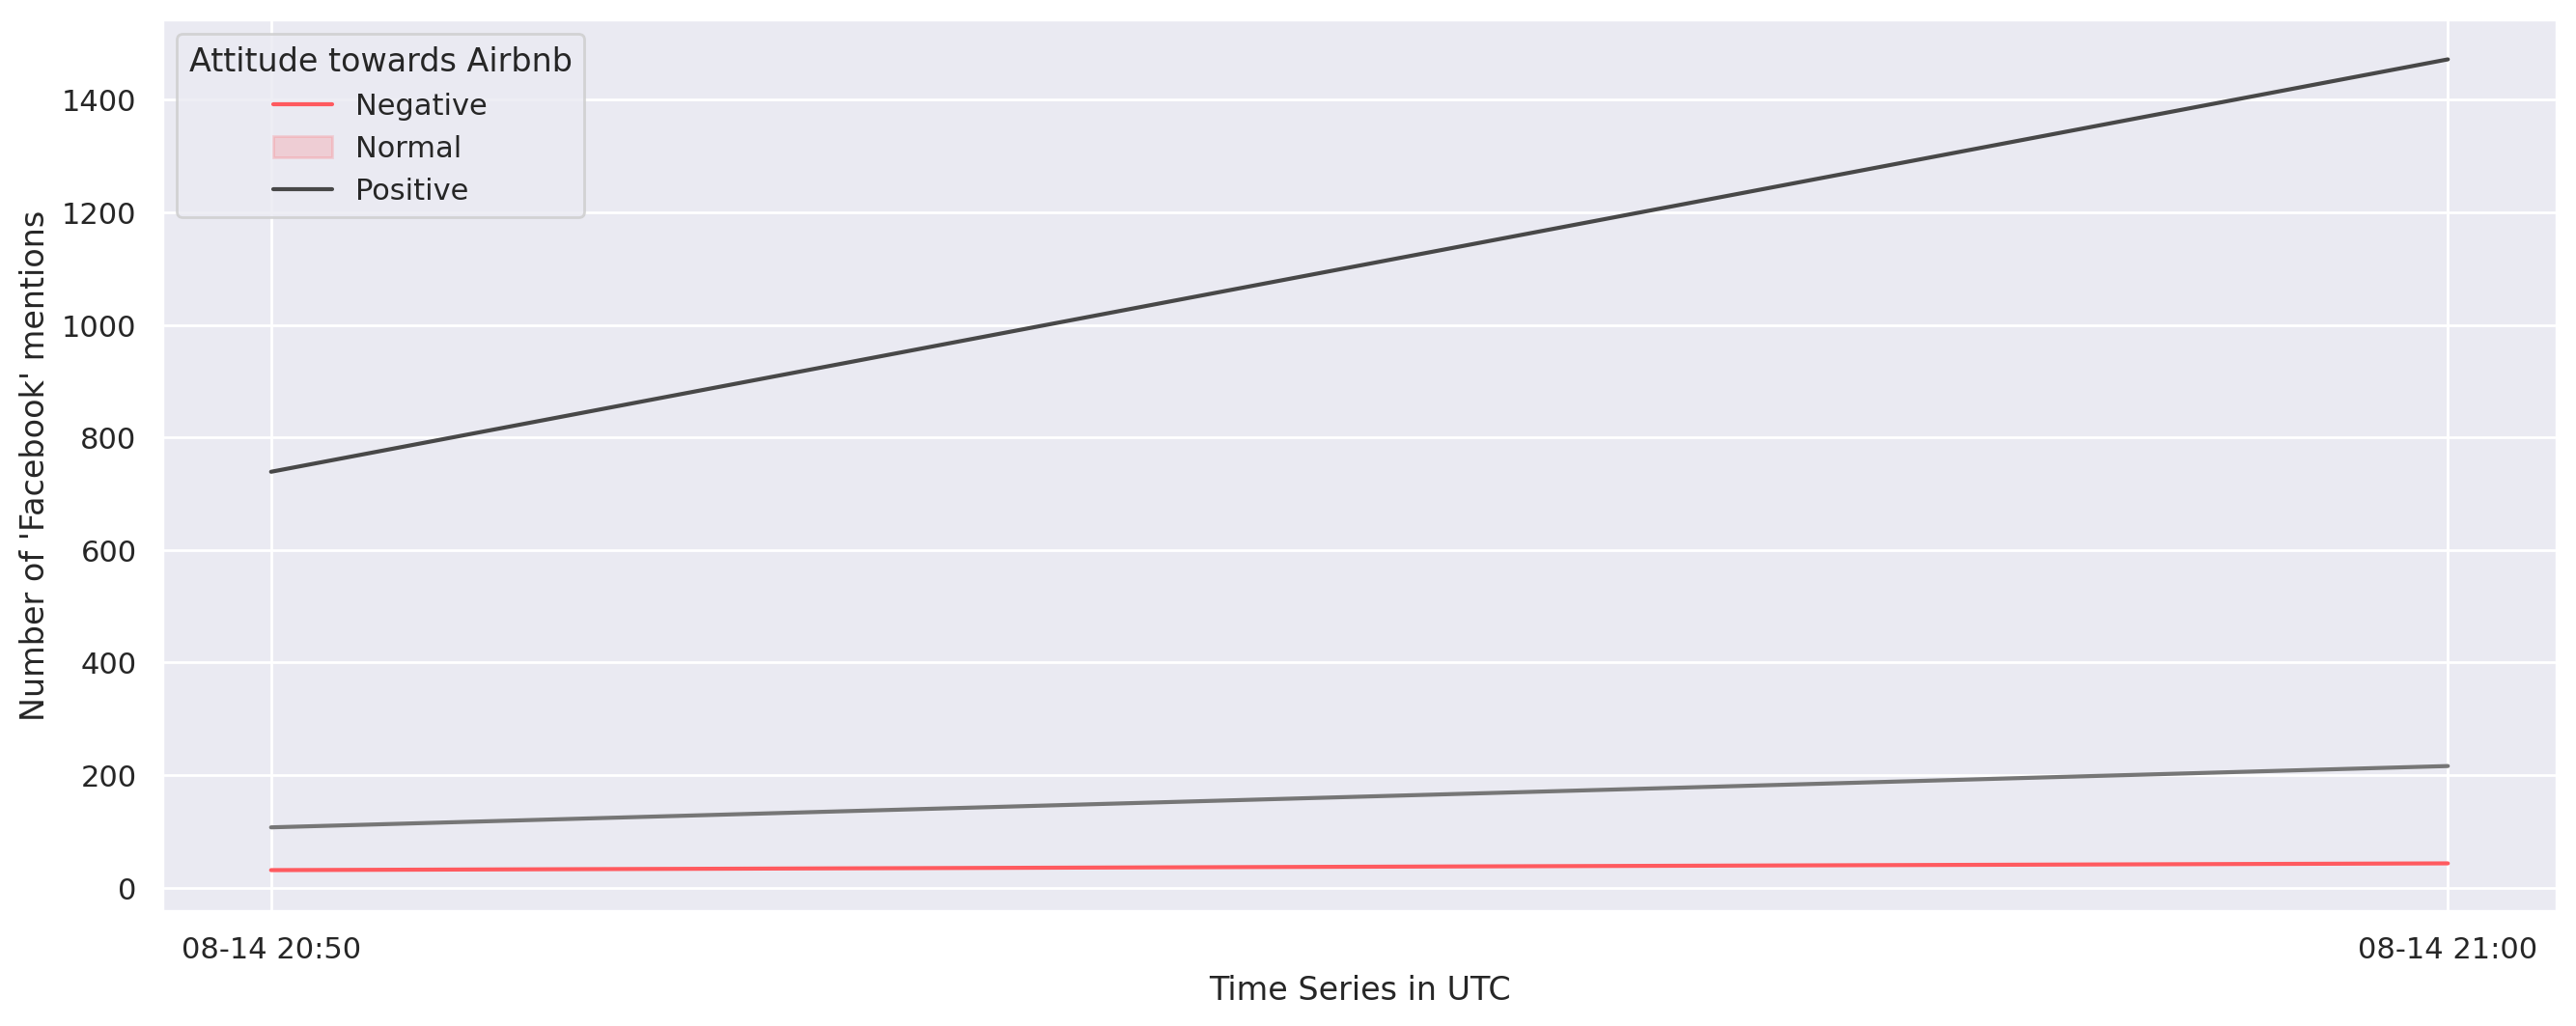

In [25]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Airbnb Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Airbnb', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [26]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
%pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="es")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
(39.9622601, -83.0007065)


'Columbus, Franklin County, Ohio, United States'

In [ ]:
pip install -U  --upgrade pip

In [2]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 840.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 1.0 MB/s eta 0:00:001 kB/s eta 0:00:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.5 MB/s eta 0:00:001.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
